In [1]:
library('MASS')

In [2]:
N = 250
P = 500

In [3]:
K = floor(P/3)
alpha = array(rnorm(K*P),c(K,P))
W = array(rnorm(N*K),c(N,K))
W_test = array(rnorm(N*10*K),c(N*10,K))

In [4]:
X = W%*%alpha

In [5]:
X_test = W_test%*%alpha

In [6]:
dim(X_test)

[1] 2500  500

In [7]:
beta = rnorm(P)
beta[50:500] <- 0 

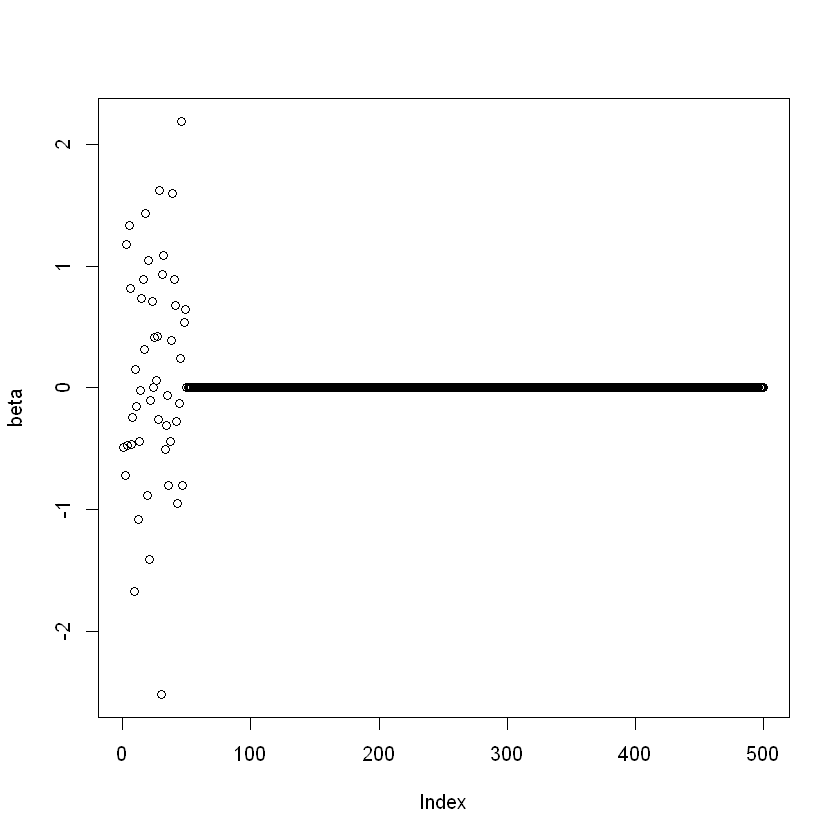

In [8]:
plot(beta)

In [9]:
sig = P*.05

In [10]:
etas = as.vector(X%*%beta)
head(etas)

[1] -30.729307 117.514570 -18.145864  -4.957576 -78.574690 -18.207562

$$Y \mid X \sim Bern(logistic(X\beta))$$

In [11]:
?rbinom

Binomial {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
size,number of trials (zero or more).
prob,probability of success on each trial.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X ≤ x], otherwise, P[X > x]."


In [12]:
y = sapply(etas,function(eta)rbinom(n=1,size=1,prob=1/(1+exp(-eta))))
y

[1] 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 [38] 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1
 [75] 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0
[112] 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0
[149] 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1
[186] 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0
[223] 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1

In [13]:
df_train = data.frame(X)
df_train$y <- y
head(df_train)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X492,X493,X494,X495,X496,X497,X498,X499,X500,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-1.499308,2.021982,-0.2621333,0.7365949,0.09196678,10.1010343,13.0297889,-6.069686,-4.516472,2.588171,...,-18.720251,-9.465193,10.5985342,19.8612405,-12.021553,-17.300748,4.5177143,-4.603873,1.731449,0
2,-9.187885,-20.134753,-26.4159753,27.7596226,1.12784884,-1.3926902,5.7161659,1.503383,-15.396475,-18.232042,...,-2.646159,5.207875,8.1624722,0.1059611,11.378862,37.077565,2.6973000,-9.966449,2.371302,1
3,2.209040,4.726669,1.5822708,-6.4323008,20.67143283,18.1649672,-0.3923786,-5.321940,-4.219012,7.617677,...,-31.395661,-5.806232,4.6029178,-17.1732665,9.737132,-4.730381,24.1684237,11.721365,25.271866,0
4,-14.028233,18.099849,-9.1092059,3.0158916,-9.53612486,0.9984527,2.7764049,-13.142445,-2.811876,-1.346495,...,6.865681,-5.272737,0.3896363,10.1155543,-3.099487,1.639182,-0.3919331,26.854233,6.153354,0
5,16.139549,-14.058263,15.6004626,-8.4905357,-3.45733215,-8.1127725,11.1616462,1.878207,10.718320,4.731227,...,2.525938,-2.730725,19.5372557,3.6914317,-5.989913,2.130082,-11.0272981,-5.263379,-13.349434,0
6,16.229614,24.678253,-5.9557221,5.5482902,3.48733015,-6.0147977,0.4103864,-15.253402,3.041767,10.918719,...,14.369442,12.067815,2.8688272,1.3404825,-6.562442,5.015352,4.9843503,-21.151996,-24.486669,0


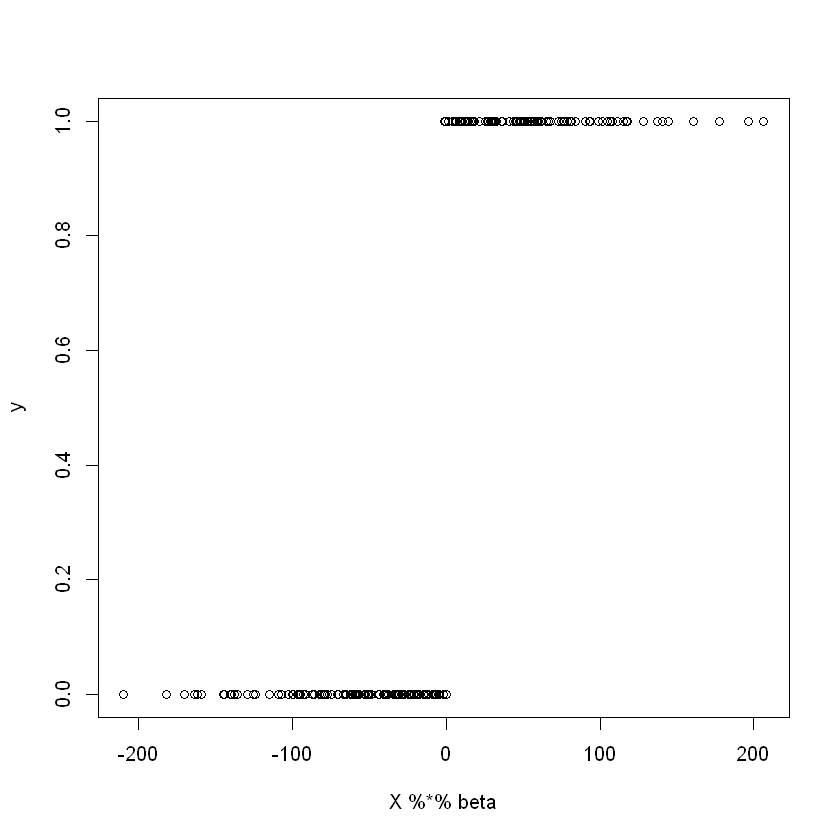

In [14]:
plot(X%*%beta,y)

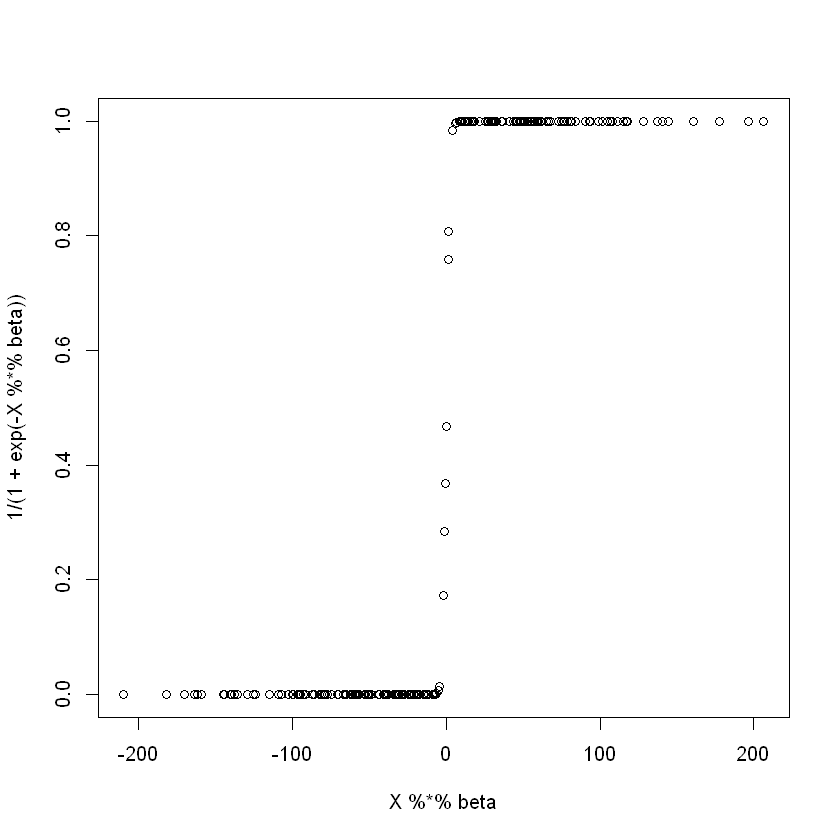

In [15]:
plot(X%*%beta,1/(1+exp(-X%*%beta)))

In [16]:
etas_test = as.vector(X_test%*%beta)
y_test = sapply(etas_test,function(eta)rbinom(n=1,size=1,prob=1/(1+exp(-eta))))
df_test = data.frame(X_test)
df_test$y <- y_test

In [17]:
naive_fit = glm(y~.,data=df_train,family='binomial')

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [18]:
naive_fit$coefficients

(Intercept)            X1            X2            X3            X4 
-1.308731e+00  8.380711e+10 -7.399243e+10 -1.165557e+11 -1.386257e+11 
           X5            X6            X7            X8            X9 
 1.666206e+11  5.050794e+10 -5.113426e+10  6.854458e+10 -1.131548e+10 
          X10           X11           X12           X13           X14 
 4.012458e+10  7.871678e+10  1.985880e+11 -6.638434e+10 -1.167454e+11 
          X15           X16           X17           X18           X19 
 6.424739e+10  1.153350e+10  3.315018e+10  1.481036e+11 -7.277569e+10 
          X20           X21           X22           X23           X24 
-8.277750e+10 -4.548504e+10  6.292978e+10 -6.675941e+10  1.094420e+11 
          X25           X26           X27           X28           X29 
-1.068778e+11  5.523096e+10 -6.292693e+10 -3.471900e+10  3.475185e+10 
          X30           X31           X32           X33           X34 
-7.598269e+10 -9.270053e+10  8.382196e+10  8.465599e+10  1.014329e+11 
          X35           X36           X37           X38           X39 
 5.322236e+09  1.015685e+11 -2.145227e+11  6.122386e+09 -9.769575e+09 
          X40           X41           X42           X43           X44 
-6.480364e+08 -1.040805e+11 -2.029659e+10  9.404404e+10 -2.374104e+10 
          X45           X46           X47           X48           X49 
 5.302199e+10  1.647408e+11 -3.426505e+10  1.188745e+11 -4.694703e+10 
          X50           X51           X52           X53           X54 
-1.012581e+11  9.160689e+10 -9.848985e+10  1.476013e+11  4.715550e+10 
          X55           X56           X57           X58           X59 
-1.692745e+10 -4.621516e+10  2.325619e+10  1.401179e+10  1.392702e+11 
          X60           X61           X62           X63           X64 
 3.819298e+10 -1.472873e+11  4.044357e+10 -3.625279e+10  8.706665e+10 
          X65           X66           X67           X68           X69 
-1.094451e+11 -1.330471e+11 -1.402728e+11 -4.568754e+10 -5.862120e+10 
          X70           X71           X72           X73           X74 
-1.282037e+11 -8.531692e+10  1.081845e+11  6.210245e+10  4.569168e+10 
          X75           X76           X77           X78           X79 
 2.387548e+10  1.224106e+11  7.586171e+10 -5.574980e+10  5.536746e+09 
          X80           X81           X82           X83           X84 
-2.626853e+10  1.428464e+08  7.883054e+10  4.001614e+10 -6.238165e+10 
          X85           X86           X87           X88           X89 
 4.409703e+09 -3.482690e+10  1.437913e+10 -7.977179e+10 -1.078805e+11 
          X90           X91           X92           X93           X94 
-8.435658e+10 -3.265151e+10  2.798156e+10 -6.596006e+10 -1.501899e+10 
          X95           X96           X97           X98           X99 
 8.203435e+10  1.262237e+11 -1.289726e+11 -2.552997e+10  8.651739e+10 
         X100          X101          X102          X103          X104 
 9.085052e+10  5.228321e+09 -2.011797e+11  9.886505e+10 -6.200097e+10 
         X105          X106          X107          X108          X109 
-1.392733e+11 -1.083003e+10  4.042733e+10  9.595496e+10 -3.971873e+10 
         X110          X111          X112          X113          X114 
 1.462247e+11  2.232943e+10  1.394189e+11 -2.298888e+10 -1.064147e+11 
         X115          X116          X117          X118          X119 
 1.205450e+11  2.208555e+11  5.965373e+10  7.266279e+10  7.593889e+10 
         X120          X121          X122          X123          X124 
-1.056250e+11 -5.450164e+10 -5.830181e+10 -6.797281e+10  1.996728e+10 
         X125          X126          X127          X128          X129 
-1.988648e+10  7.558694e+10 -1.413704e+11 -8.177396e+10 -8.429353e+10 
         X130          X131          X132          X133          X134 
 3.650889e+09  7.171812e+10 -1.634408e+11 -1.028937e+11  3.975190e+10 
         X135          X136          X137          X138          X139 
-4.814897e+10 -8.252026e+10 -4.551822e+10  1.907494e+10  1.404263e+11 
         X140          X14

In [19]:
lambda = exp(seq(-50,20,length.out=100))
lambda

[1] 1.928750e-22 3.911585e-22 7.932859e-22 1.608817e-21 3.262748e-21
  [6] 6.616989e-21 1.341953e-20 2.721537e-20 5.519391e-20 1.119356e-19
 [11] 2.270100e-19 4.603858e-19 9.336816e-19 1.893545e-18 3.840189e-18
 [16] 7.788064e-18 1.579452e-17 3.203195e-17 6.496212e-17 1.317459e-16
 [21] 2.671862e-16 5.418648e-16 1.098924e-15 2.228665e-15 4.519825e-15
 [26] 9.166395e-15 1.858983e-14 3.770096e-14 7.645912e-14 1.550623e-13
 [31] 3.144728e-13 6.377640e-13 1.293412e-12 2.623094e-12 5.319744e-12
 [36] 1.078866e-11 2.187986e-11 4.437327e-11 8.999085e-11 1.825052e-10
 [41] 3.701282e-10 7.506354e-10 1.522320e-09 3.087329e-09 6.261232e-09
 [46] 1.269804e-08 2.575216e-08 5.222645e-08 1.059174e-07 2.148050e-07
 [51] 4.356335e-07 8.834829e-07 1.791740e-06 3.633724e-06 7.369344e-06
 [56] 1.494534e-05 3.030977e-05 6.146948e-05 1.246627e-04 2.528211e-04
 [61] 5.127318e-04 1.039842e-03 2.108842e-03 4.276820e-03 8.673571e-03
 [66] 1.759036e-02 3.567399e-02 7.234835e-02 1.467255e-01 2.975654e-01
 [71] 6.034751e-01 1.223873e+00 2.482065e+00 5.033732e+00 1.020862e+01
 [76] 2.070351e+01 4.198757e+01 8.515256e+01 1.726929e+02 3.502285e+02
 [81] 7.102781e+02 1.440474e+03 2.921341e+03 5.924601e+03 1.201534e+04
 [86] 2.436761e+04 4.941853e+04 1.002229e+05 2.032561e+05 4.122119e+05
 [91] 8.359831e+05 1.695409e+06 3.438360e+06 6.973137e+06 1.414181e+07
 [96] 2.868019e+07 5.816462e+07 1.179603e+08 2.392284e+08 4.851652e+08

In [20]:
#install.packages('glmnet')

In [21]:
library('glmnet')

Warning message:
"package 'glmnet' was built under R version 4.0.4"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.0.5"
Loaded glmnet 4.1-1



In [22]:
fit.ridge = glmnet(x=X,y=y,family="binomial",alpha=0,lambda=lambda)

In [23]:
dim(fit.ridge$beta)

[1] 500  65

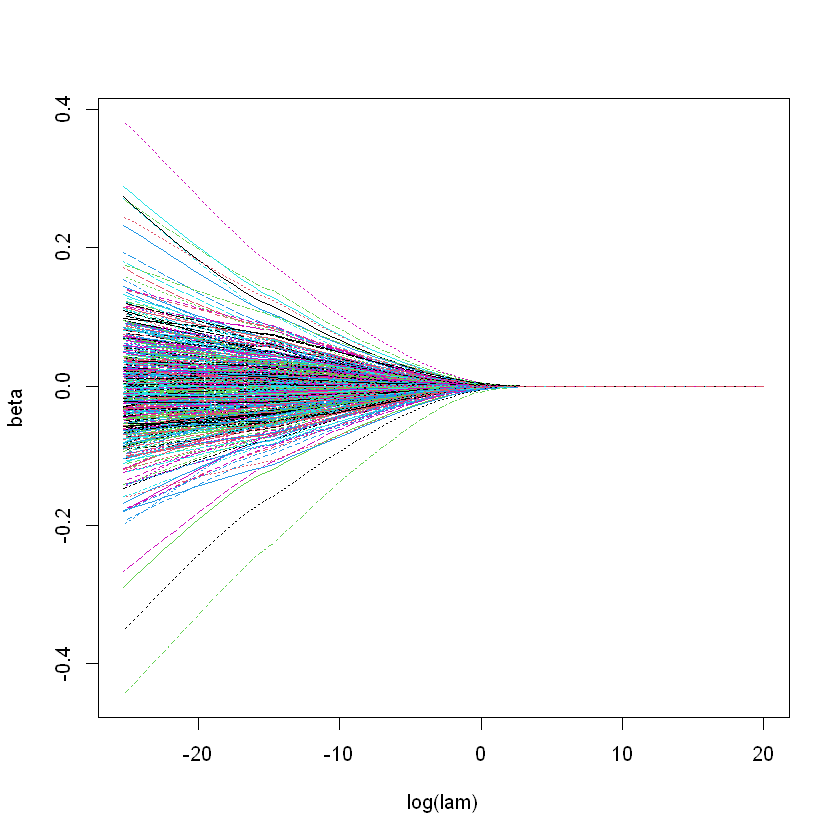

In [24]:
matplot(log(fit.ridge$lambda),t(fit.ridge$beta),type='l',xlab="log(lam)",ylab="beta")

In [25]:
cv.ridge = cv.glmnet(x=X,y=y,family="binomial",alpha=0,lambda=lambda)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collaps

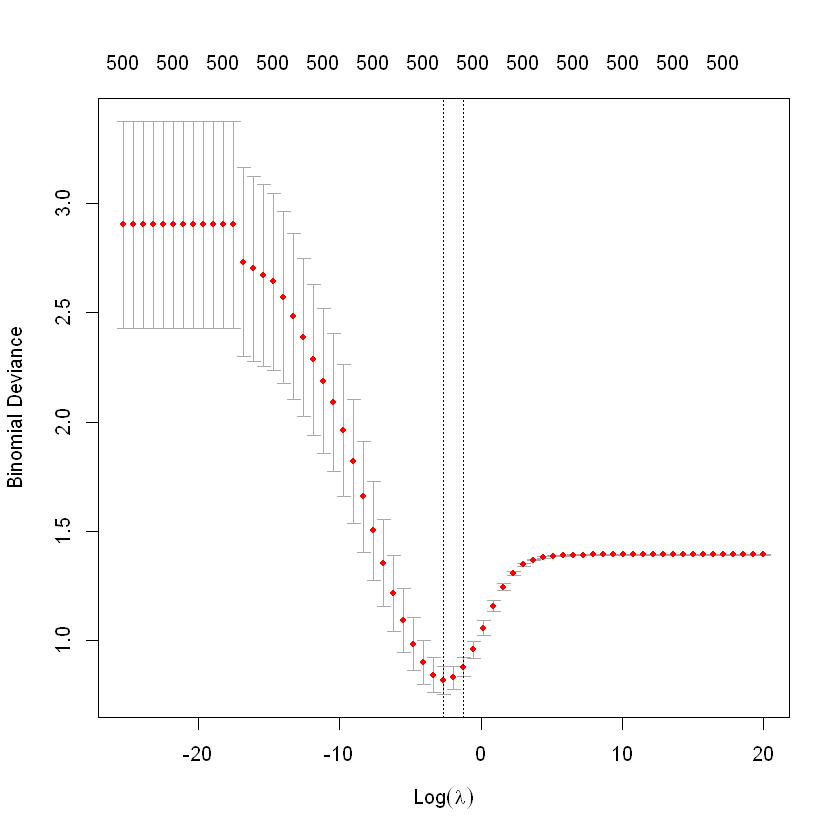

In [26]:
plot(cv.ridge)

In [27]:
lam_hat = cv.ridge$lambda.min
log(lam_hat)

[1] -2.626263

In [28]:
lam_hat = cv.ridge$lambda.1se
log(lam_hat)

[1] -1.212121

In [29]:
best.ridge = glmnet(x=X,y=y,family="binomial",alpha=0,lambda=lam_hat)

In [30]:
sample(best.ridge$beta,20)

[1] -0.0018911707  0.0014868228 -0.0046066606 -0.0031527442  0.0034639329
 [6] -0.0007754688 -0.0028928218 -0.0009433288 -0.0028198556 -0.0026451887
[11]  0.0011743301 -0.0048014587  0.0006175998 -0.0009481865 -0.0027415586
[16]  0.0016380087  0.0039378305  0.0010218338  0.0044412089  0.0034705502

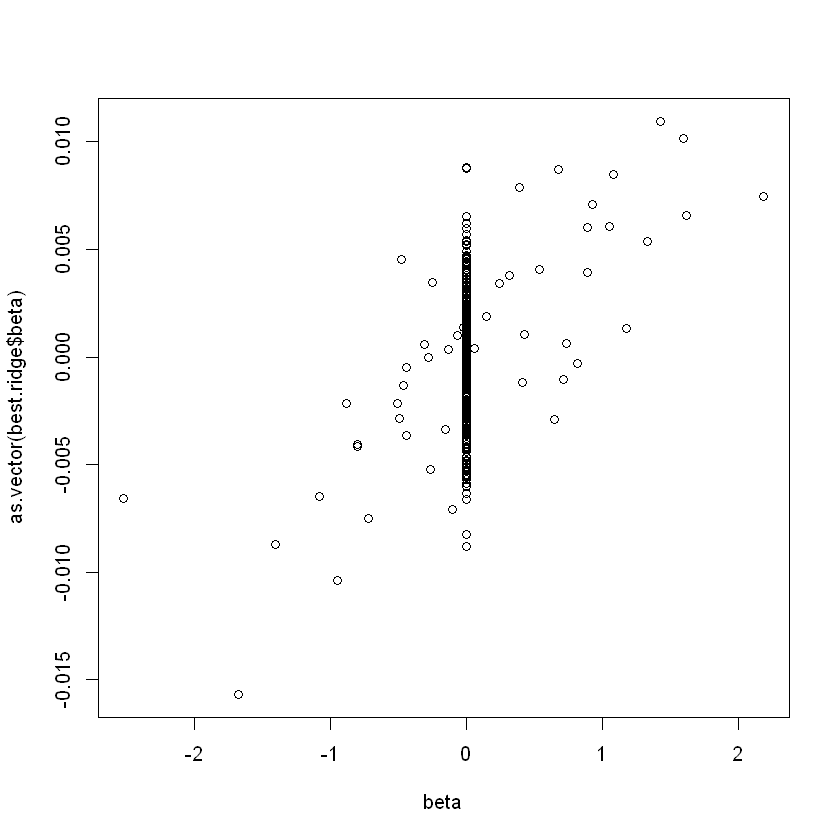

In [31]:
plot(beta,as.vector(best.ridge$beta))

In [32]:
p_hat = unlist(predict(best.ridge,newx=X_test,type='response'))

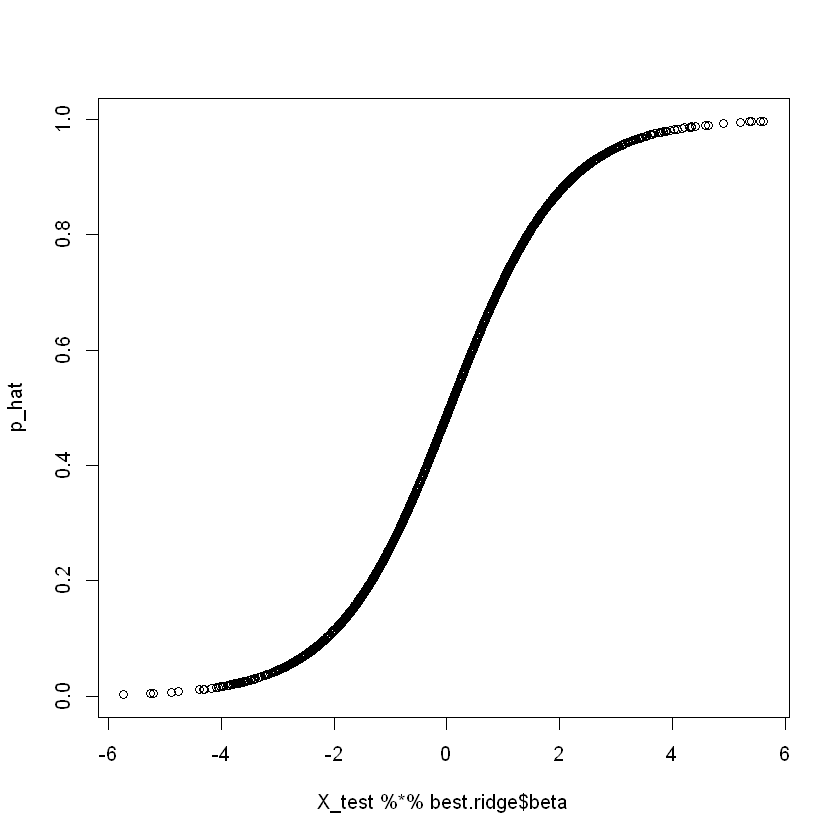

In [33]:
plot(X_test%*%best.ridge$beta,p_hat)

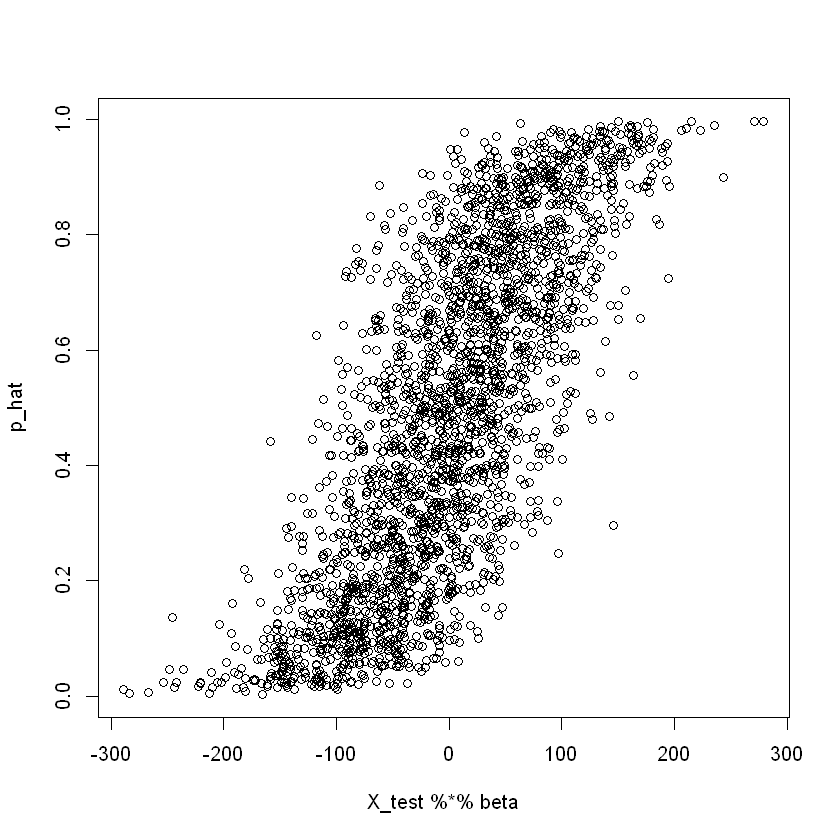

In [34]:
plot(X_test%*%beta,p_hat)

In [35]:
y_hat = as.factor(as.vector(predict(best.ridge,newx=X_test,type='class')))

In [36]:
head(y_hat)

[1] 0 1 1 0 0 1
Levels: 0 1

In [37]:
y_test_f = as.factor(y_test)
head(y_test_f)

[1] 0 1 1 1 0 1
Levels: 0 1

In [38]:
library('caret')

Loading required package: lattice

Loading required package: ggplot2



In [39]:
cm = caret::confusionMatrix(data=y_hat,reference=y_test_f)

In [40]:
cm

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 983 299
         1 249 969
                                          
               Accuracy : 0.7808          
                 95% CI : (0.7641, 0.7969)
    No Information Rate : 0.5072          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.5618          
                                          
 Mcnemar's Test P-Value : 0.03633         
                                          
            Sensitivity : 0.7979          
            Specificity : 0.7642          
         Pos Pred Value : 0.7668          
         Neg Pred Value : 0.7956          
             Prevalence : 0.4928          
         Detection Rate : 0.3932          
   Detection Prevalence : 0.5128          
      Balanced Accuracy : 0.7810          
                                          
       'Positive' Class : 0               
                              

### lasso 

In [41]:
fit.lasso = glmnet(x=X,y=y,family="binomial",alpha=1,lambda=lambda)

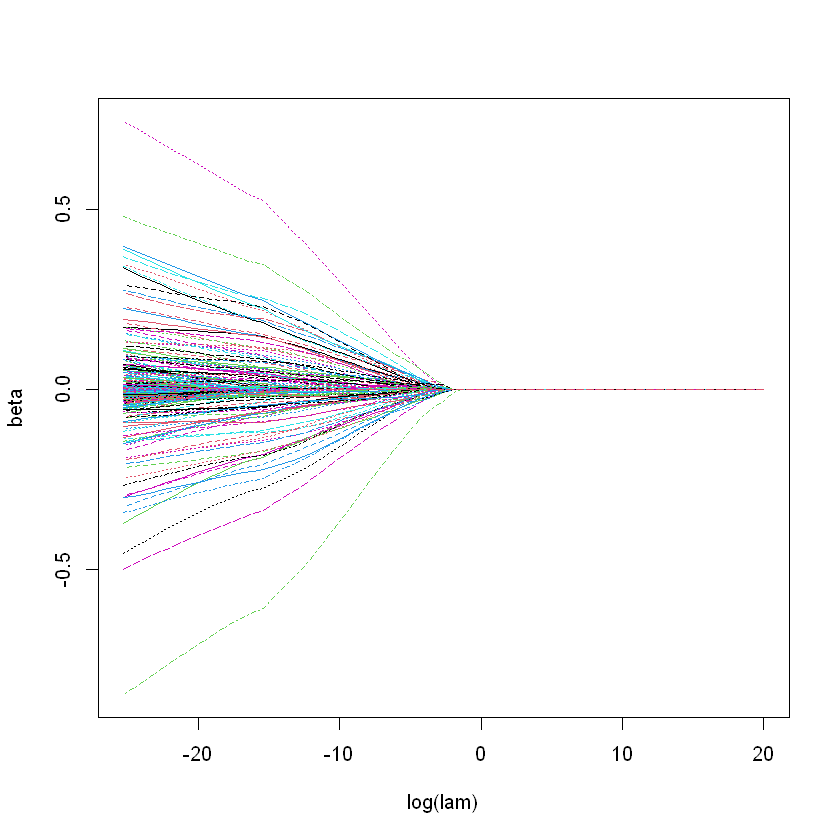

In [42]:
matplot(log(fit.lasso$lambda),t(fit.lasso$beta),type='l',xlab="log(lam)",ylab="beta")

In [43]:
cv.lasso = cv.glmnet(x=X,y=y,family="binomial",alpha=1,lambda=lambda)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collaps

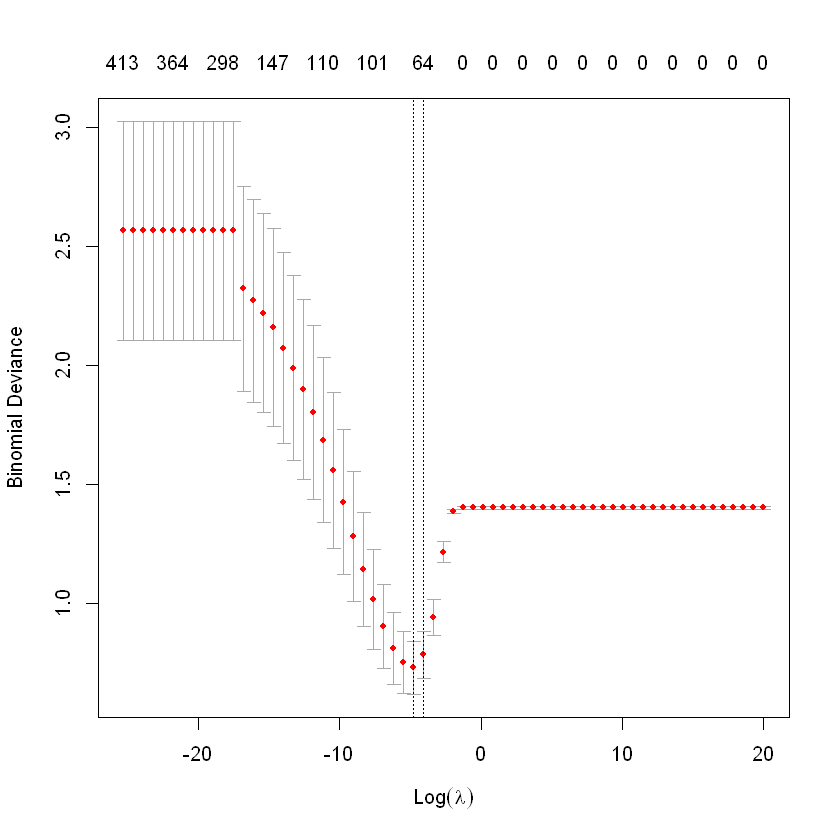

In [44]:
plot(cv.lasso)

In [45]:
lam_hat = cv.lasso$lambda.min
log(lam_hat)

[1] -4.747475

In [46]:
lam_hat = cv.lasso$lambda.1se
log(lam_hat)

[1] -4.040404

In [47]:
best.lasso = glmnet(x=X,y=y,family="binomial",alpha=1,lambda=lam_hat)

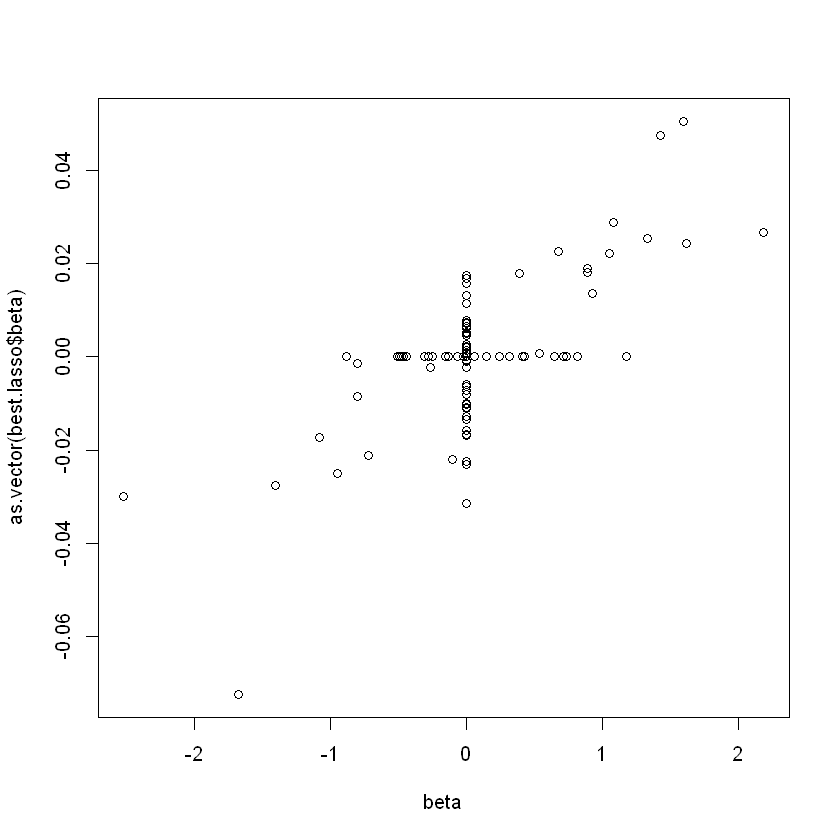

In [48]:
plot(beta,as.vector(best.lasso$beta))

In [49]:
y_hat = as.factor(as.vector(predict(best.lasso,newx=X_test,type='class')))
cm = caret::confusionMatrix(data=y_hat,reference=y_test_f)
cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1016  235
         1  216 1033
                                         
               Accuracy : 0.8196         
                 95% CI : (0.804, 0.8345)
    No Information Rate : 0.5072         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.6392         
                                         
 Mcnemar's Test P-Value : 0.3967         
                                         
            Sensitivity : 0.8247         
            Specificity : 0.8147         
         Pos Pred Value : 0.8122         
         Neg Pred Value : 0.8271         
             Prevalence : 0.4928         
         Detection Rate : 0.4064         
   Detection Prevalence : 0.5004         
      Balanced Accuracy : 0.8197         
                                         
       'Positive' Class : 0              
                                         

### elastic net

In [50]:
lam_seq = exp(seq(-10,10,length.out=100))
fit.en = glmnet(x=X,y=y,family="binomial",alpha=1/2,lambda=lam_seq)
fit.en.cv = cv.glmnet(x=X,y=y,family="binomial",alpha=1/2,lambda=lam_seq)

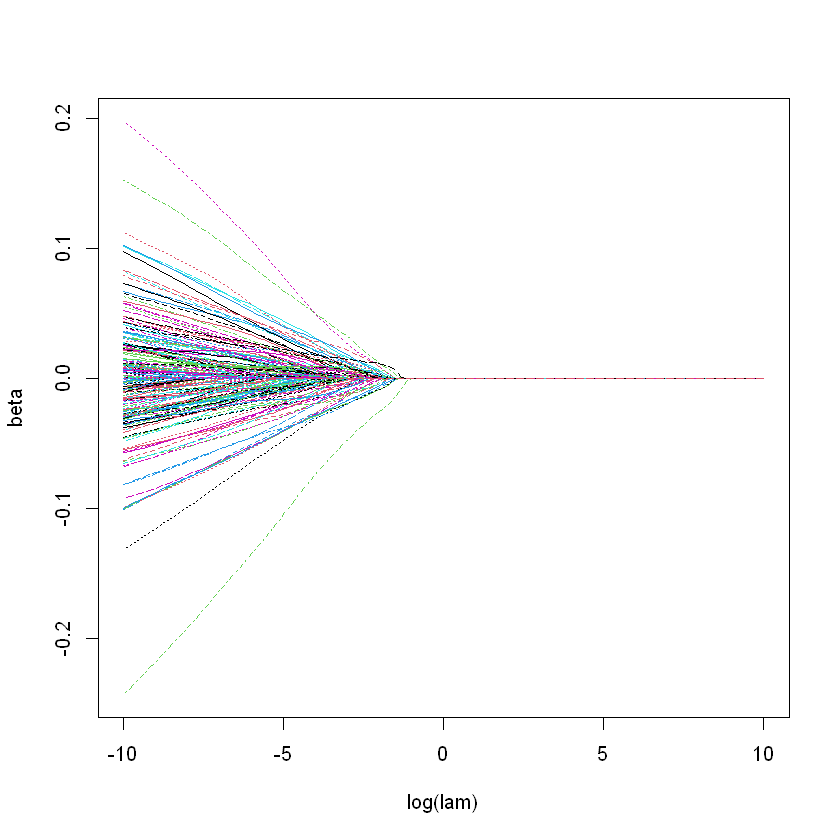

In [51]:
matplot(log(fit.en$lambda),t(fit.en$beta),type='l',xlab="log(lam)",ylab="beta")

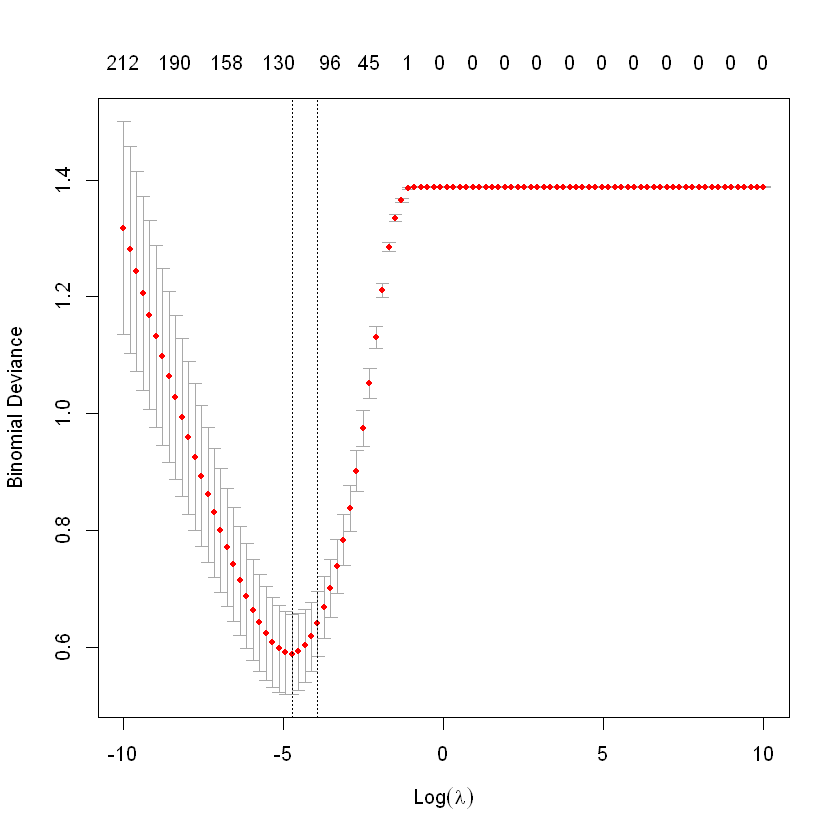

In [52]:
plot(fit.en.cv)

In [53]:
fit.en = glmnet(x=X,y=y,family="binomial",alpha=1/2,lambda=fit.en.cv$lambda.1se)

In [54]:
y_hat = as.factor(as.vector(predict(fit.en,newx=X_test,type='class')))
cm = caret::confusionMatrix(data=y_hat,reference=y_test_f)
cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1032  248
         1  200 1020
                                          
               Accuracy : 0.8208          
                 95% CI : (0.8052, 0.8357)
    No Information Rate : 0.5072          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.6417          
                                          
 Mcnemar's Test P-Value : 0.02638         
                                          
            Sensitivity : 0.8377          
            Specificity : 0.8044          
         Pos Pred Value : 0.8063          
         Neg Pred Value : 0.8361          
             Prevalence : 0.4928          
         Detection Rate : 0.4128          
   Detection Prevalence : 0.5120          
      Balanced Accuracy : 0.8210          
                                          
       'Positive' Class : 0               
                        